# GRIP_TASK_4: EXPLORATORY DATA ANALYSIS - TERRORISM

### NAME : RAMA S

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:
4/1AY0e-g5X-FQR4ZmwS1naXb1hA81YsUdcx-ajgOa0eYO9Z6fZqLdyUbizJN0
Mounted at /content/drive


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/grip dataset/globalterrorismdb_0718dist.csv",encoding = 'latin1')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
data=dataset.copy()

data=data[['iyear', 'imonth', 'iday','extended', 'country_txt', 
       'region_txt', 'city', 'success', 'suicide','nwound','nkill',
       'targtype1_txt', 'gname', 'weaptype1_txt']]
data.head()

,iyear,imonth,iday,extended,country_txt,region_txt,city,success,suicide,nwound,nkill,targtype1_txt,gname,weaptype1_txt
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,0.0,1.0,Private Citizens & Property,MANO-D,Unknown
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,0.0,0.0,Government (Diplomatic),23rd of September Communist League,Unknown
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,0.0,1.0,Journalists & Media,Unknown,Unknown
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,NaN,NaN,Government (Diplomatic),Unknown,Explosives
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,NaN,NaN,Government (Diplomatic),Unknown,Incendiary


In [6]:
data.isnull().sum()

iyear                0
imonth               0
iday                 0
extended             0
country_txt          0
region_txt           0
city               434
success              0
suicide              0
nwound           16311
nkill            10313
targtype1_txt        0
gname                0
weaptype1_txt        0
dtype: int64

In [7]:
data.dropna(axis=0, inplace=True)

In [8]:
data.rename(columns={'iyear': 'year', 'imonth': 'month', 'iday':'day', 'country_txt':'country','attacktype1_txt':'attactype','nwound':'wound','nkill':'killed',
                  'region_txt':'region', 'targtype1_txt':'target', 'gname':'group', 'weaptype1_txt':'weapon'}, inplace=True)
data.head()

,year,month,day,extended,country,region,city,success,suicide,wound,killed,target,group,weapon
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,0.0,1.0,Private Citizens & Property,MANO-D,Unknown
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,0.0,0.0,Government (Diplomatic),23rd of September Communist League,Unknown
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,0.0,1.0,Journalists & Media,Unknown,Unknown
5,1970,1,1,0,United States,North America,Cairo,1,0,0.0,0.0,Police,Black Nationalists,Firearms
6,1970,1,2,0,Uruguay,South America,Montevideo,0,0,0.0,0.0,Police,Tupamaros (Uruguay),Firearms


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


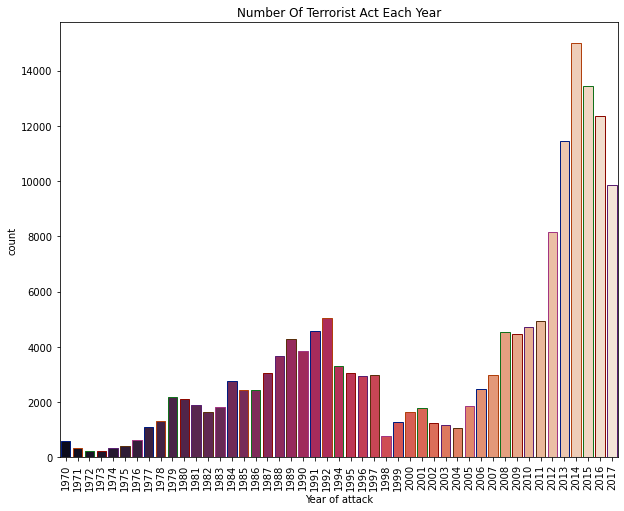

In [9]:
plt.subplots(figsize=(10,8))
sns.countplot('year',data=data,palette='rocket',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number Of Terrorist Act Each Year')
plt.show()

In [10]:
data['Decade'] = pd.cut(data['year'], bins=[1969, 1980, 1990, 2000, 2010, 2020], labels=['1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2017'])
data[['year','Decade']].sample(10)

,year,Decade
161721,2016,2010-2017
49356,1991,1990-2000
96790,2010,2000-2010
170101,2016,2010-2017
158253,2016,2010-2017
165770,2016,2010-2017
69266,1999,1990-2000
117840,2013,2010-2017
136628,2014,2010-2017
168359,2016,2010-2017


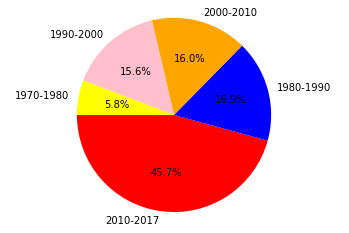

In [11]:
dec = data['Decade'].value_counts()

colors= 'red','blue','orange','pink','yellow'
plt.pie(dec,labels=dec.index,colors=colors,autopct='%1.1f%%', startangle=180)
plt.axis('equal')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


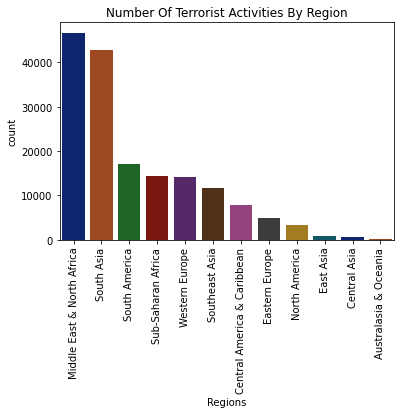

In [12]:
sns.countplot('region',data=data,palette='dark',order=data['region'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number Of Terrorist Activities By Region')
plt.show()

In [13]:
def city_name(country=list(data['country'].unique())):
    a=data[data['country']==country]
    a=pd.DataFrame(a['city'].value_counts().iloc[1:10])
    return a.style.highlight_max(axis=0, color='red').highlight_min(axis=0, color='green')

In [14]:
city_name(data['country'])

,city
Baghdad,7374
Karachi,2571
Lima,2124
Mosul,2114
Mogadishu,1375
Santiago,1354
Belfast,1328
San Salvador,1254
Istanbul,1011


In [15]:
def weapon_type(country=list(data['country'].unique())):
    a=data[data['country']==country]
    a=pd.DataFrame(a['weapon'].value_counts())
    return a.style.highlight_max(axis=0)

In [16]:
city_name(data['country'])

,city
Baghdad,7374
Karachi,2571
Lima,2124
Mosul,2114
Mogadishu,1375
Santiago,1354
Belfast,1328
San Salvador,1254
Istanbul,1011


In [17]:
#weapons used
def weapon_type(country=list(data['country'].unique())):
    a=data[data['country']==country]
    a=pd.DataFrame(a['weapon'].value_counts())
    return a.style.highlight_max(axis=0)

In [18]:
weapon_type(data['country'])

,weapon
Explosives,86231
Firearms,51645
Unknown,12083
Incendiary,10285
Melee,3381
Chemical,302
Sabotage Equipment,136
"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",133
Other,109
Fake Weapons,33


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


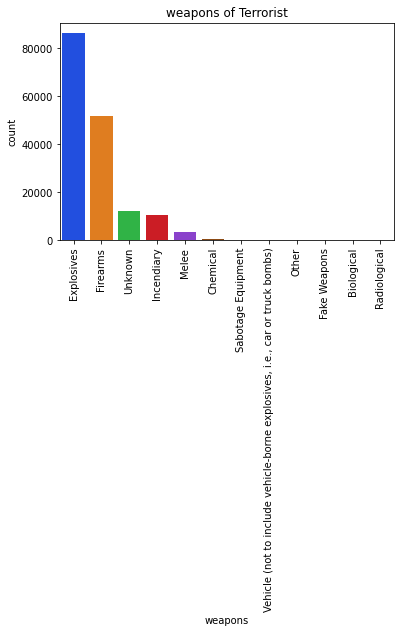

In [19]:
sns.countplot('weapon',data=data,palette='bright',order=data['weapon'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('weapons')
plt.title('weapons of Terrorist')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


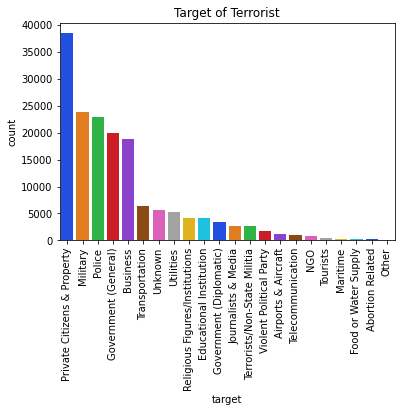

In [20]:
sns.countplot('target',data=data,palette='bright',order=data['target'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('target')
plt.title('Target of Terrorist')
plt.show()

Text(0, 0.5, 'Wounded')

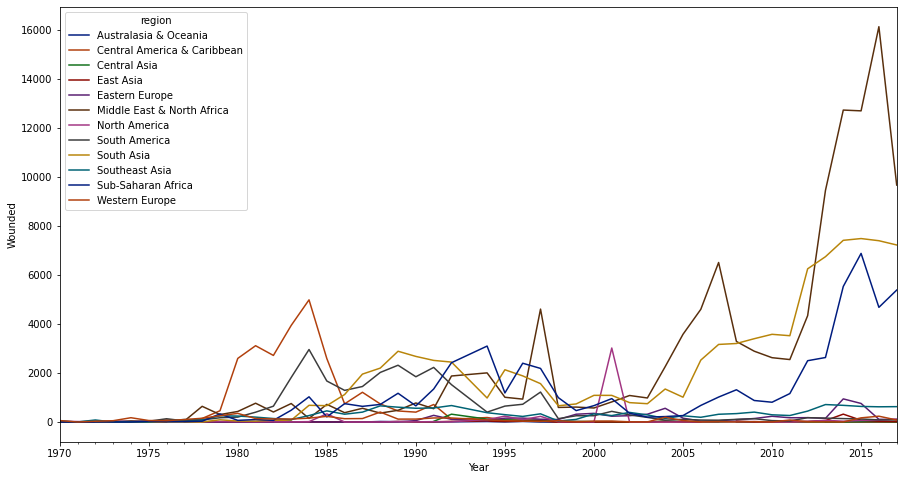

In [21]:

d=data.groupby(['year','region'])['killed'].sum()
plot_df = d.unstack('region').loc[:]
plot_df.index = pd.PeriodIndex(plot_df.index.tolist(),freq='A')
plot_df.plot(figsize=(15,8),color=sns.color_palette('dark',12))
plt.xlabel("Year")
plt.ylabel("Wounded")

In [22]:
suc = data['success'].value_counts()
suc

1    145013
0     19371
Name: success, dtype: int64

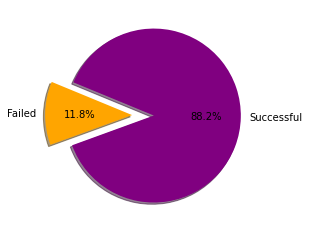

In [24]:
labels = 'Successful', 'Failed'

colors = ['purple', 'orange']
explode = (0.25, 0)
plt.pie(suc, labels=labels, explode=explode,colors=colors,autopct='%1.1f%%', shadow=True, startangle=200)
plt.show()

In [ ]:
2010-2017 year is highly attacked by terrorist
Middle East and North Africa Region Mostly affect
In city wise Baghdad city highly affect
In terrorist moslty use Explosive, firearms weapon but they leastuse any biological and radiology
Middle east and South Africa more people killed by terrorist its is Hot zone
88.2% terrorist plane success remain 11.8% they plan failed</div>